<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSCM602013 • Statistika dan Probabilitas

Semester Gasal 2025/2026

Fakultas Ilmu Komputer, Universitas Indonesia


- **Name:**
- **NPM:**
- **Class:**




# 🪙 Problem 1: The Coin Toss Game (20 points)

Imagine you found a game in the city's carnival. Each player tosses a coin 20 times. Every time the coin lands on heads, they win 1 point. Every tails gives 0 points. After 20 tosses, the total points = the number of heads.

**Now here’s the big question:** If thousands of players play this game, how often will each final score (0, 1, 2, …, 20) appear?

*Note: This question is the heart of probability: how randomness accumulates when we repeat the same simple action many times.*

---

## Concepts Used In This Problem

* **Bernoulli trial:** a single experiment with only two outcomes (like a coin toss: $head$ or $tail$).
* **Binomial distribution:** the theoretical rule that tells us the chance of getting exactly $𝑘$ heads out of $𝑛$ tosses.
* **Empirical probability:** probability we estimate by simulating and counting outcomes. For example, if out of $10,000$ players, $2,450$ ended with exactly $10$ heads, we say the empirical probability is $2,450/10,000=0.245$.
* **Distribution (a histogram):** a way to see "which results are common, which are rare."
* **Law of Large Numbers (LLN):** as the number of players grows, the empirical proportions converge to the true $p$.

---

## Your Tasks

1.   **Simulate the game (5 pts):**
     Suppose we toss a coin 20 times for 50,000 players (so $50,000 \times 20$ tosses), count how many heads each player got. Show the results by using:
     * A **frequency table** for all $k=0,1,2,…,20$ with two columns:
       * **count** of players who got exactly $k$ heads
       * **proportion** (i.e., count / players)
     * A plot showing the **simulated/empirical histogram** of those proportions.
2.   **Compare with discrete random variable theory (5 pts):**
     Use the **binomial random variables formula** to compute the exact theoretical probabilities below where $𝑛=20$ (tosses), $𝑝=0.5$ (probability of head for a fair coin), and $𝑘$ is the score (i.e., the number of heads in the simulation). Overlay the empirical and theoretical distributions (histograms) in one plot.

     $P(K = k) = \binom{n}{k} p^k  (1-p)^{n-k}$

     In other words,
     * $n=20 →$ number of tosses,
     * $p=0.5 →$ probability of head in one toss,
     * $k=0,1,2,…,20 →$ possible values of the random variable $𝐾$ (i.e., the number of heads).
3.   **Explore biased coins by observing how the distribution shifts and skews (5 pts):**
     * Repeat with $𝑝=0.3$ (a "bad" coin that lands heads only $30%$ of the time).
     * Repeat with $𝑝=0.7$ (a "lucky" coin that lands heads 70% of the time).
     * Explain it with your own words.
4.   **Should you play the game (5 pts)?** Suppose you are at that carnival. You found out that the carnival now charges an entry fee $F$ to play the game. If a player gets more than $15$ heads in $20$ tosses from a fair coin (i.e., $p=0.5$), the player wins a prize with value $A$.
     * Propose a rational player's decision rule **using expected net value (i.e., expected profit)** to decide whether to play or not.
     * Should a rational player join if:
       * $F=1$ and $A=100$?
       * $F=1$ and $A=200$?
       * $F=2$ and $A=100$?
       * $F=2$ and $A=200$?




## Scaffolding Codes (fill the TODOs)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

np.random.seed(42)  # reproducibility

def simulate_game(n=20, p=0.5, players=50_000):
    """
    Simulate the coin toss game.
    n = number of tosses per player
    p = probability of heads
    players = how many players play
    Returns: scores (0..n), empirical probabilities
    """
    # TODO 1: simulate all coin tosses at once (matrix: players x n)
    flips = (np.random.rand(players, n) < p)

    # TODO 2: count number of heads for each player
    counts = counts = flips.sum(axis=1)

    # TODO 3: turn counts into empirical probabilities
    flips = (np.random.rand(players, n) < p)       # each flip: True=head
    counts = flips.sum(axis=1)                     # heads per player
    vals, freq = np.unique(counts, return_counts=True)
    pmf_emp = np.zeros(n+1, dtype=float)
    pmf_emp[vals] = freq / players

    return np.arange(n+1), pmf_emp

def binomial_theory(n, p):
    """Theoretical binomial distribution"""
    k_vals = np.arange(n+1)
    pmf = np.array([comb(n, k) * (p**k) * (1-p)**(n-k) for k in k_vals], dtype=float)
    return k_vals, pmf

def plot_game(n=20, p=0.5, players=50_000):
    k_emp, pmf_emp = simulate_game(n, p, players)
    k_th, pmf_th = binomial_theory(n, p)

    plt.figure(figsize=(8,4.8))
    plt.bar(k_emp, pmf_emp, alpha=0.6, label=f'Empirical (players={players})')
    plt.plot(k_th, pmf_th, marker='o', linewidth=2, label='Theory (Binomial)')
    plt.xlabel('Final score (number of heads)')
    plt.ylabel('Probability')
    plt.title(f'Coin Toss Game: n={n}, p={p}')
    plt.legend()
    plt.show()

TASK 1: Simulate the game with fair coin (p=0.5)

k | count | proportion
------------------------------
 0 |      0 | 0.00000
 1 |      1 | 0.00002
 2 |     12 | 0.00024
 3 |     61 | 0.00122
 4 |    216 | 0.00432
 5 |    744 | 0.01488
 6 |   1812 | 0.03624
 7 |   3602 | 0.07204
 8 |   5956 | 0.11912
 9 |   7950 | 0.15900
10 |   8882 | 0.17764
11 |   8061 | 0.16122
12 |   6127 | 0.12254
13 |   3713 | 0.07426
14 |   1832 | 0.03664
15 |    740 | 0.01480
16 |    221 | 0.00442
17 |     59 | 0.00118
18 |      9 | 0.00018
19 |      2 | 0.00004
20 |      0 | 0.00000

TASK 1: Empirical vs Theoretical Distribution (Fair Coin)



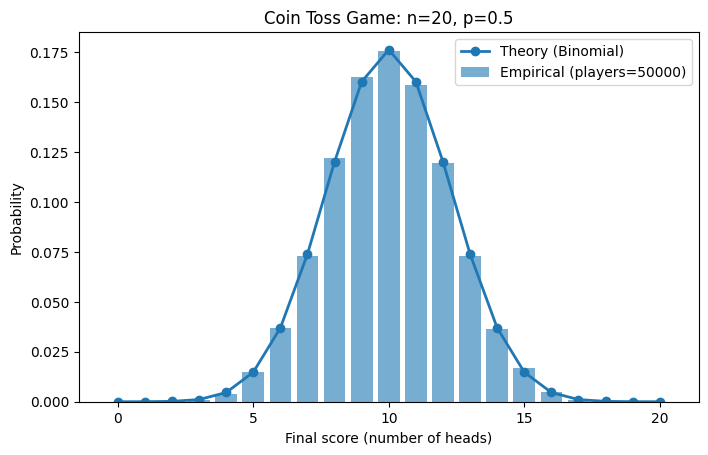

In [38]:
print("TASK 1: Simulate the game with fair coin (p=0.5)\n")
n = 20
p = 0.5
players = 50_000

# Jalankan simulasi
k_emp, pmf_emp = simulate_game(n, p, players)

# Hitung jumlah pemain yang dapat k head
counts = (pmf_emp * players).astype(int)

# Buat tabel
print("k | count | proportion")
print("-"*30)
for k, c, pr in zip(k_emp, counts, pmf_emp):
    print(f"{k:2d} | {c:6d} | {pr:.5f}")

# Plot
print("\nTASK 1: Empirical vs Theoretical Distribution (Fair Coin)\n")
plot_game(n=20, p=0.5, players=50_000)

TASK 2: Comparison with theory



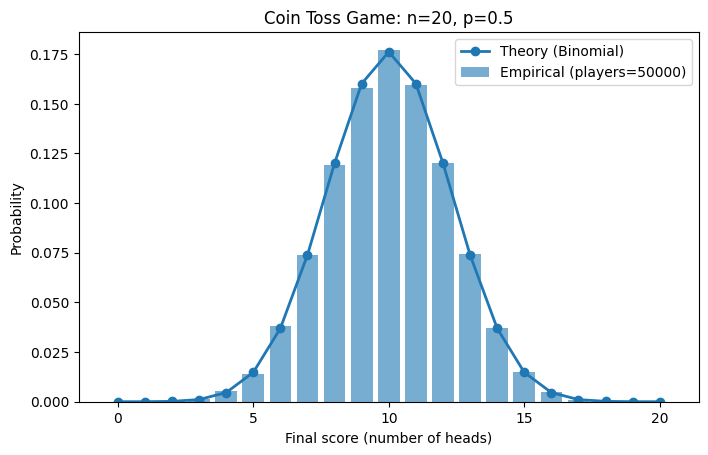


Plot yang sama dari Task 1 sudah menampilkan dua distribusi secara bersamaan, yaitu distribusi empiris (batang) dan distribusi teoretis (garis).
Diagram batang menunjukkan hasil simulasi, sedangkan garis menunjukkan probabilitas binomial yang sebenarnya.
Kesesuaian yang sangat dekat antara keduanya membuktikan bahwa hasil simulasi mengikuti distribusi Binomial.


In [37]:
print("TASK 2: Comparison with theory\n")
plot_game(n=20, p=0.5, players=50_000)
print("\nPlot yang sama dari Task 1 sudah menampilkan dua distribusi secara bersamaan, yaitu distribusi empiris (batang) dan distribusi teoretis (garis).")
print("Diagram batang menunjukkan hasil simulasi, sedangkan garis menunjukkan probabilitas binomial yang sebenarnya.")
print("Kesesuaian yang sangat dekat antara keduanya membuktikan bahwa hasil simulasi mengikuti distribusi Binomial.")

In [ ]:
# TASK 3: Explore biased coins

print("\nTASK 3a: Biased coin (p=0.3)")
plot_game(n=20, p=0.3, players=50_000)

print("\nTASK 3b: Biased coin (p=0.7)")
plot_game(n=20, p=0.7, players=50_000)

In [ ]:
from math import comb

def p_win_binom(n=20, p=0.5, k_min=16):
    return sum(comb(n, k) * (p**k) * ((1-p)**(n-k)) for k in range(k_min, n+1))

# Students define and document their own decision rule here.
def decide(F, A, pwin):
    # TODO 4: replace with your own rule & justification:
    # return "PLAY" or "DON'T PLAY" based on Expected Profit
    raise NotImplementedError("Define your decision rule and return 'PLAY' or 'DON'T PLAY'.")

# Compute the chance to win once; reuse it.
pwin = p_win_binom(n=20, p=0.5, k_min=16)
print(f"P(win) = {pwin:.9f}")

for F, A in [(1,100), (1,200), (2,100), (2,200)]:
    # Students compute whatever numbers they need here (e.g., EV or threshold)
    # and then call decide(F, A, pwin).
    pass


# 🚪 Problem 2: Many-Door Monty… then the Classic 3 Doors (10 points)

You are on a game show with $N$ closed doors. **One door** hides a car; **the rest** hide goats.

You pick one door. The host **knows** where the car is. He then **opens every other door except one**, carefully **never** opening the car and **never** opening your chosen door. Now two doors remain closed: **your original door and one other**. Now, you may stay or switch to that other closed door to win the prize (i.e., the car).

In this Problem 2, you will explore this for $N=10$, then $N=5$, and finally the classic $N=3$.

---

## Learning Goals of This Problem

* See, by simulation, with $N=\{10,5,3\}$ that **switching is almost always better**.
* Quantify how much better by **comparing the win rates**.

---

## Your Tasks (10 points)
1. (**4 pts**) Simulation tables (counts, proportions) for $N=\{10,5,3\}$.
2. (**4 pts**) Bar plots comparing stay vs switch for each $N$.
3. (**2 pts**) Short reasoning (2–4 sentences) of why switching almost always better.

## Scaffold (student starter; fill TODOs)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # keep results reproducible

def monty_trial_N(N=10, switch=True):
    """
    Simulate ONE round with N doors.
    Host knows the car, never opens it, and leaves exactly ONE other door closed.
    Return True if the player wins under the chosen strategy.
    """
    # TODO: place the car uniformly at random among N doors
    # TODO: player picks one door uniformly at random
    # TODO: determine which single "other" door the host leaves closed
    #   - if the player picked the car: host must leave a random goat closed
    #   - if the player picked a goat: host must leave the car closed
    # TODO: if switch==True, final choice is that other closed door; else keep original pick
    # TODO: return whether the final choice has the car
    raise NotImplementedError

def simulate_N(N=10, trials=200_000):
    """
    Run 'trials' rounds for both strategies.
    Return: wins_stay, p_stay, wins_switch, p_switch
    """
    # TODO: run monty_trial_N with switch=False and switch=True for 'trials' times
    # TODO: compute win rates as wins / trials
    raise NotImplementedError

# --- Run the three scenarios and print a small table for each ---
def run_and_report(N, trials=200_000):
    # TODO: call simulate_N, then print wins & win-rates for STAY and SWITCH
    # Example format:
    # N=10: STAY wins=xxxxx, p=0.xxxxx | SWITCH wins=xxxxx, p=0.xxxxx
    raise NotImplementedError

# === Execute (students complete TODOs, then run) ===
# for N in [10, 5, 3]:
#     run_and_report(N, trials=200_000)

# === Plot (grouped bars for N=10,5,3) ===
# After you have p_stay and p_switch for each N, build a grouped bar chart:
# labels = ['N=10','N=5','N=3']
# stay   = [...]
# switch = [...]
# x = np.arange(len(labels)); w = 0.35
# plt.figure(figsize=(7.2,4.5))
# plt.bar(x - w/2, stay,   width=w, label='Stay')
# plt.bar(x + w/2, switch, width=w, label='Switch')
# plt.ylim(0,1); plt.xticks(x, labels)
# plt.ylabel('Win rate (proportion)')
# plt.title('Monty Hall with N doors: Stay vs Switch')
# plt.legend(); plt.tight_layout(); plt.show()

# === Write your 2–4 sentence reasoning in Markdown/markdown cell ===
# Hint target (do NOT just copy): staying ≈ 1/N; switching ≈ 1 - 1/N.


# 🂡 Problem 3: Mystery Deck (10 points)

At the Magic Club, the host secretly chooses one of two decks with equal chance:

1. Standard deck (S): 26 red, 26 black
2. Crimson deck (C): 32 red, 20 black

You open cards **one by one (without replacement)** and only see the **color** (Red/Black). After each $n$-th draw (i.e, $n=0,...,52$), you must update the posterior $P(C|n)$ where $P(C)=0.5$.

Show how the posterior changes from **before the first card** (i.e, draw $n=0$) to **after all cards** (i.e, $n=52$) by plotting $P(C|n)$ for $n=0,...,52$.

---

## Goals of Learning: Hypergeometric Random Variable

After draw $n$, let $r$ be the number of reds and $b=n-r$ the number of blacks observed. Then, the likelihood under a deck with $R$ reds and $B$ blacks is hypergeometric:

$\mathcal{L}(r,b \mid R,B)
= \frac{\binom{R}{r}\,\binom{B}{b}}{\binom{R+B}{\,r+b\,}}.$

---

## Your Tasks

1. (8 pts) A line plot of $P(C|$data up to draw $n)$ for $n=0,...,52$.
2. (2 pts) What is the earlieast draw to know which deck you have?

## Student scaffold (with TODOs)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb
np.random.seed(42)

# --- Deck definitions ---
N = 52
R_S, B_S = 26, 26    # Standard
R_C, B_C = 32, 20    # Crimson
prior_C = 0.5

# --- Choose a true deck for this run (set to "C" or "S") ---
true_deck = "C"  # Change to "S" to test the other case.

# --- Build and shuffle the true deck (list of "R"/"B") ---
def build_deck(true_deck="C", seed=7):
    if true_deck not in ("C","S"):
        raise ValueError("true_deck must be 'C' or 'S'")
    # TODO: construct the deck list with the correct counts; then shuffle with RNG.
    rng = np.random.default_rng(seed)
    rng.shuffle(deck)
    return deck

# --- Hypergeometric log-likelihood helper ---
def log_hypergeom_likelihood(R, B, r, b):
    """
    log P(see r reds and b blacks in n=r+b draws without replacement | R,B in deck)
    """
    n = r + b
    # TODO: log likelihood of the hypergeometric random variables
    return 0.0

# --- Posterior updater using Bayes in log-space for stability ---
def posterior_C_after(r, b, prior=prior_C):
    """
    Return P(C | r reds, b blacks) with prior P(C)=prior.
    """
    # TODO: compute log-likelihoods under C and S
    # TODO: combine with log-prior, normalize safely, and return posterior for C
    return 0.5

# --- Run the single reveal sequence; record posterior after each draw ---
r = b = 0
posteriors = [prior_C]   # include n=0
draw_idx   = [0]
# TODO: iterate over the 52 cards, update r/b, compute posterior, append to lists

# --- Plot posterior vs draw index (0..52) ---
plt.figure(figsize=(7,4))
# TODO: plot draw_idx vs posteriors as a line with markers
plt.xlabel("Draw number (n)")
plt.ylabel("Posterior  P(Crimson | data up to n)")
plt.title("Sequential Bayes: posterior over time")
plt.ylim(0,1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Print the final counts and posterior ---
# print(f"Final r={r}, b={b}, posterior P(C|all)={posteriors[-1]:.6f}")
# Explain briefly: each step used a hypergeometric likelihood.


# 🎲 Problem 4: The Sum and Difference of Two Dice (15 points)

In a new tabletop experiment, a player rolls **two independent dice** at once:

* **Die A:** a **6-sided** die with faces 1–6.
* **Die B:** an **8-sided** die with faces 1–8.

Each roll records two random variables:

* (S = A + B)  (the **sum** of the two dice)
* (D = |A - B|)  (the **absolute difference** between them)

The designer wants to understand how these two outcomes behave jointly.

---

## Tasks

1. **(7 pts) Simulate the joint PMF.**
   Roll both dice 10 000 times and build the **empirical joint probability table** (P(S,D)).
   Present it either as a matrix or DataFrame whose rows = values of (S), columns = values of (D).

2. **(2 pts) Find the marginals.**
   Compute
   $$
   P_S(s)=\sum_d P(S=s,D=d),\qquad
   P_D(d)=\sum_s P(S=s,D=d).
   $$

3. **(4 pts) Moments.**
   Estimate
   $$
   E[S],;E[D],;\mathrm{Var}(S),;\mathrm{Var}(D),;\mathrm{Cov}(S,D),;\mathrm{Corr}(S,D).
   $$

4. **(2 pts) Analysis.**
   Answer briefly:

   * Why are some ((S,D)) pairs impossible (i.e., have (P(S,D)=0))?
   * Does knowing (S) give information about (D)? Are they independent? Explain using intuition or your simulation table.


## Starter Code

In [ ]:
import numpy as np
import pandas as pd

N = 10_000
rng = np.random.default_rng(42)

# --- Step 1: Simulate the two dice ---
A = rng.integers(1, 7, size=N)     # 6-sided
B = rng.integers(1, 9, size=N)     # 8-sided

# --- Step 2: Define random variables ---
S = A + B          # Sum
D = np.abs(A - B)  # Absolute difference

# TODO 1: Build joint frequency table of (S,D)
# df = pd.DataFrame(...)
# joint_counts = ...
# joint_pmf = ...

# TODO 2: Compute marginals P_S and P_D

# TODO 3: Estimate E[S], E[D], Var(S), Var(D), Cov(S,D), Corr(S,D)

# TODO 4: Write your analysis in a Markdown cell


# 🐞Problem 5: Finding errors in a piece of software (20 Point)

One good brief intro about Monte Carlo methods is as follows (taken from Baron, 2019).
> Computer simulations refer to a regeneration of a process by writing a suitable computer
program and observing its results. Monte Carlo methods are those based on computer
simulations involving random numbers.
> The main purpose of simulations is estimating such quantities whose direct computation is
complicated, risky, consuming, expensive, or impossible. For example, suppose a complex
device or machine is to be built and launched. Before it happens, its performance is
simulated, and this allows experts to evaluate its adequacy and associated risks carefully and
safely. For example, one surely prefers to evaluate reliability and safety of a new module of
a space station by means of computer simulations rather than during the actual mission.
> Monte Carlo methods are mostly used for the computation of probabilities, expected values,
and other distribution characteristics. Recall that probability can be deﬁned as a long-run
proportion. With the help of random number generators, computers can actually simulate
a long run. Then, probability can be estimated by a mere computation of the associated
observed frequency. The longer run is simulated, the more accurate result is obtained.
Similarly, one can estimate expectations, variances, and other distribution characteristics
from a long run of simulated random variables.

Every day, software developers ﬁnd a random number of errors and correct them.
The number of errors $X_t$ found on day $t$ is modeled by a Poisson($\lambda_t$) distribution
whose parameter is the smallest number of errors found during the previous 3 days.
That is,
$$\lambda_t = min( X_{t-1} , X_{t - 2} , X_{t - 3}).$$
Suppose that during the ﬁrst three days, software developers ﬁnd 28, 22, and 18 errors.

1. Predict the time it will take to ﬁnd all the errors.
2. Estimate the probability that some errors will remain undetected after 21 days.
3. Predict the total number of errors in this new release.

### Target Output
1. The expected time to detect all the errors is about 19.7 days,
2. The probability that errors remain after 21 days is about 0.34,
3. The total number of errors is about 222 errors overall.

### Your task
Write Python code to reproduce the target output above.
Do not hardcode any result.
